In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import os

C:\Users\Desk\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Get the current working directory
current_dir =os.getcwd()
# Get the current working director
file_path = os.path.join(current_dir, 'data', '2018-0101-2024-05-29_135856_BTCUSDT_15m_klines.csv')
print(file_path)
coin_Name='BTC'

C:\Users\Desk\Desktop\Github\Graph-Prediction---Research\data\2018-0101-2024-05-29_135856_BTCUSDT_15m_klines.csv


In [9]:
data = pd.read_csv(file_path)
data.head()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,qav,numTrades,tbbav,tbqav,ignore
0,2018-01-01 00:00:00.000,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999,1.675545e+06,1572,63.227133,8.576108e+05,0
1,2018-01-01 00:15:00.000,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999,1.321757e+06,1461,47.686389,6.422812e+05,0
2,2018-01-01 00:30:00.000,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999,1.078825e+06,1000,43.710406,5.900347e+05,0
3,2018-01-01 00:45:00.000,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999,1.917783e+06,1195,73.897993,1.000614e+06,0
4,2018-01-01 01:00:00.000,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999,9.778198e+05,898,34.257652,4.618369e+05,0


In [16]:
# Combine bid and ask data for simplicity, and convert to numpy array
#Open,High,Low,Close
features = data[['Open', 'High', 'Low', 'Close','Volume']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Split the data into training and test sets
train_size = int(len(scaled_features) * 0.8)
train_data = scaled_features[:train_size]
test_data = scaled_features[train_size:]

# Convert the data into sequences suitable for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 4])  # Predict the future price based on past prices
    return np.array(X), np.array(y)

seq_length = 50  # Example sequence length
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 5)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            11200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31451 (122.86 KB)
Trainable params: 31451 (122.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
load_weights=False
model_path=os.path.join(current_dir,'weight1.h5py')
print(model_path)
if load_weights:
    #model.load.weights(model_path)
    model=tf.keras.models.load_model(model_path)
    model.summary()
else:
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

C:\Users\Desk\Desktop\Github\Graph-Prediction---Research\weight1.h5py
Epoch 1/20
5592/5592 [==============================] - 112s 20ms/step - loss: 2.7993e-04 - val_loss: 2.7719e-04
Epoch 2/20
5592/5592 [==============================] - 109s 20ms/step - loss: 2.4519e-04 - val_loss: 2.7371e-04
Epoch 3/20
5592/5592 [==============================] - 110s 20ms/step - loss: 2.4203e-04 - val_loss: 2.7592e-04
Epoch 4/20
5592/5592 [==============================] - 110s 20ms/step - loss: 2.3975e-04 - val_loss: 2.8165e-04
Epoch 5/20
5592/5592 [==============================] - 109s 20ms/step - loss: 2.3939e-04 - val_loss: 2.7386e-04
Epoch 6/20
5592/5592 [==============================] - 110s 20ms/step - loss: 2.3816e-04 - val_loss: 2.7074e-04
Epoch 7/20
5592/5592 [==============================] - 110s 20ms/step - loss: 2.3802e-04 - val_loss: 2.6887e-04
Epoch 8/20
5592/5592 [==============================] - 110s 20ms/step - loss: 2.3808e-04 - val_loss: 2.7165e-04
Epoch 9/20
5592/5592 [====

In [19]:
predictions = model.predict(X_test)

1397/1397 [==============================] - 11s 7ms/step


In [20]:
predictions = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], 4)))))[:, 0]  # Inverse scaling

178979
179030


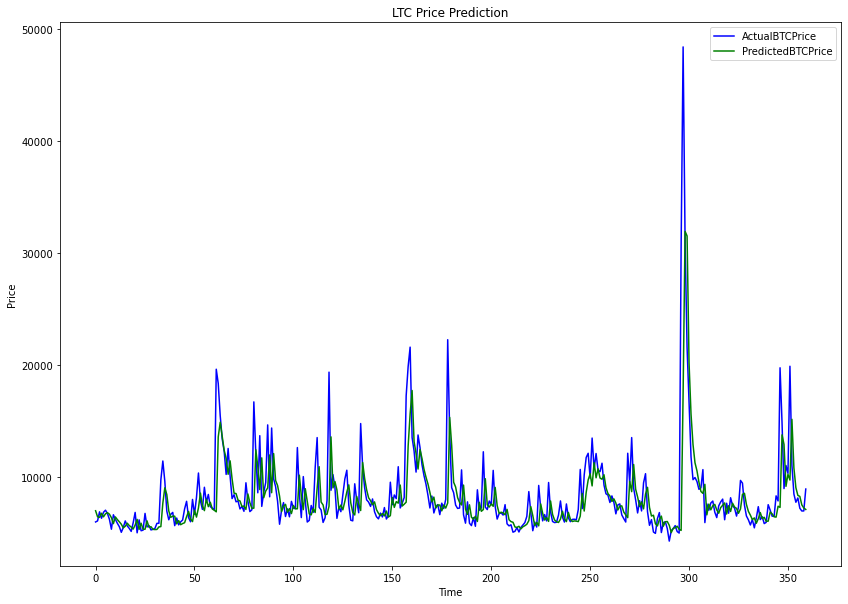

INFO:tensorflow:Assets written to: C:\Users\Desk\Desktop\Github\Graph-Prediction---Research\weight1.h5py\assets


INFO:tensorflow:Assets written to: C:\Users\Desk\Desktop\Github\Graph-Prediction---Research\weight1.h5py\assets


In [25]:
import matplotlib.pyplot as plt


# Inverse transform the actual test data for comparison
test_data_extended = np.zeros((y_test.shape[0], 5))
test_data_extended[:, 0] = y_test
inversed_test_data = scaler.inverse_transform(test_data_extended)[:, 0]
crude_test_data = features[train_size:]
print(train_size)
k=len(data)-len(predictions)
print(k)

# Plot the results
start=1305
lenGr=1665
plt.figure(figsize=(14, 10))
plt.plot(inversed_test_data[start:lenGr], color='blue', label='Actual'+coin_Name+'Price')
plt.plot(predictions[start:lenGr], color='green', label='Predicted'+coin_Name+'Price')
#plt.plot(data['Open'][:1400], color='lime', label='Open LTC Price',)
#plt.plot(data['Close'][k:k+lenGr].values, color='lime', label='Close LTC Price',)
#plt.plot(crude_test_data[:,lenGr], color='red', label='Hight LTC Price',)
#plt.plot(first_column[:,3], color='blue', label='Close LTC Price',)
plt.title('LTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
model_path = os.path.join(current_dir,'weight1.h5py')
model.save(model_path)